# Gonorrhea Simple

## Equations

$\lambda(t) = \frac{1}{N} * c * \beta_i * I(t)$

$\dot{S(t)} = -\lambda * S(t) + r * I(t)$

$\dot{I(t)} = \lambda * S(t) - r * I(t)$


With variables:

* $S$: Susceptibles
* $I$: Infective
* $\beta$: Transmission probability per partnership
* $r$: Recovery rate
* $c$: Partner change rate

## Model's Code

In [14]:
import aux
import model
import warnings
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
warnings.filterwarnings("ignore",category=DeprecationWarning)
plt.rcParams['figure.figsize'] = [12, 5]

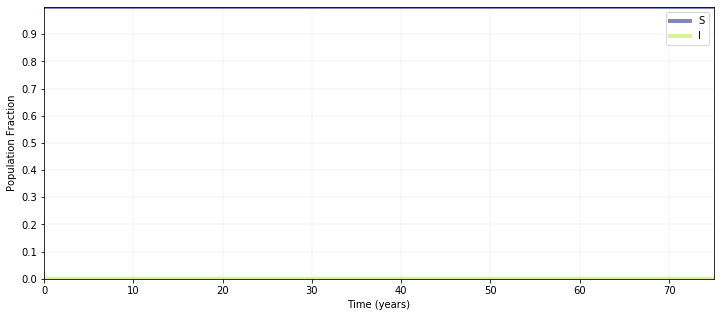

In [17]:
# User inputs ############################################################
(N, tmax) = (200000000, 75 * 12)
(beta, partRate, duration) = (.75, 2/12, 2)
(iInit) = (1)
# Internals ##############################################################
(sInit, rec) = (N - iInit, 1 / duration)
t = np.linspace(0, tmax, tmax * 10)
y0 = (sInit, iInit)
# Run ####################################################################
ret = odeint(model.dGonorrhea, y0, t, args=(N, beta, partRate, rec))
(S, I) = ret.T / N
# Plot ###################################################################
tp = ((S, '#02146b', 'S'), (I, '#b4e830', 'I'))
(fig, ax) = aux.plotEpiDynamicsPop(tp, t/12, tmax/12, 1)
ax.set_xticks(np.arange(0, tmax/12, 10))
ax.set_yticks(np.arange(0, 1, .1))
plt.grid(b=True, which='major', lw=.2, alpha=.5, color='#666666', linestyle='--')
# Save Figure ############################################################
plt.savefig(
    './img/Gonorrhea.png',  
    dpi=500, pad_inches=.01, bbox_inches='tight'
)

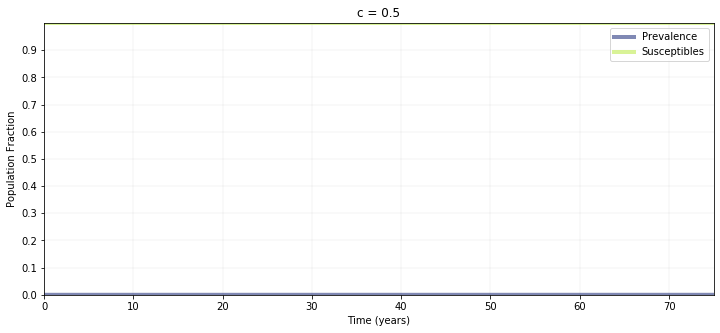

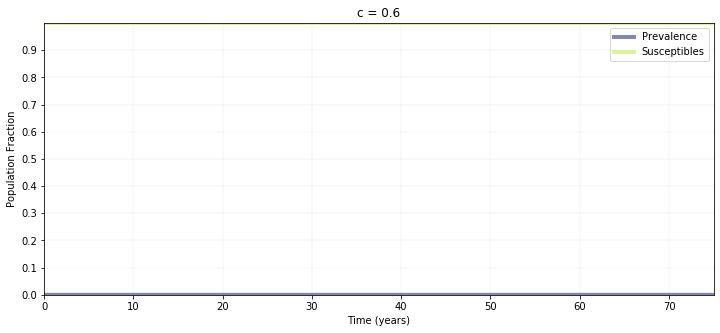

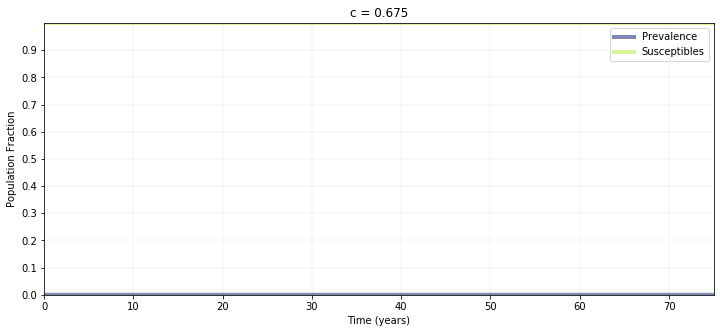

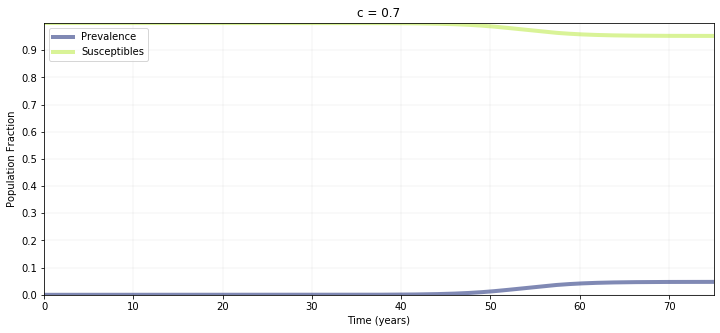

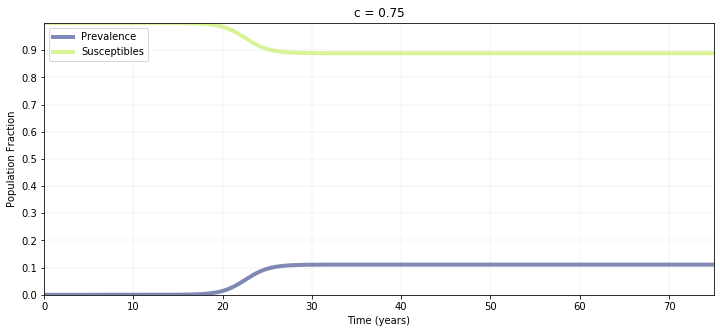

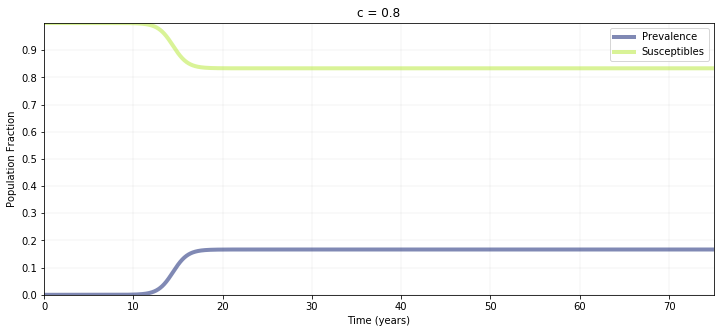

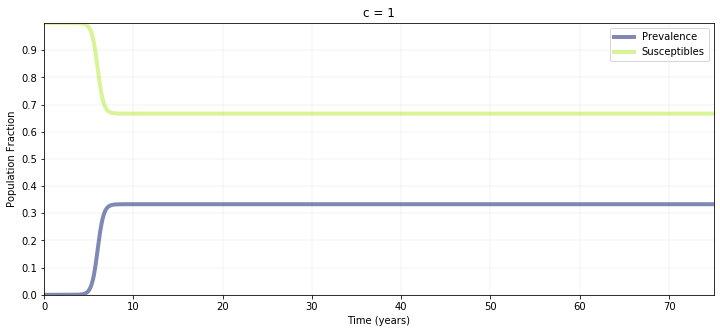

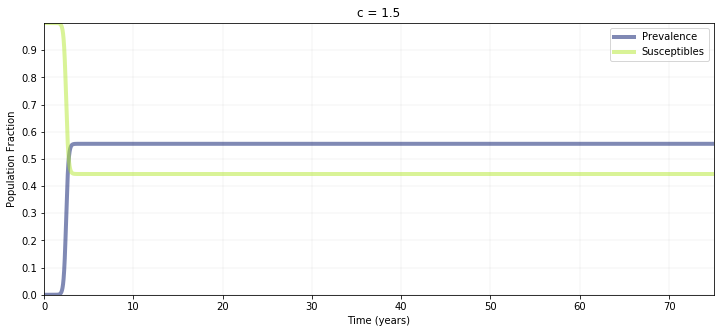

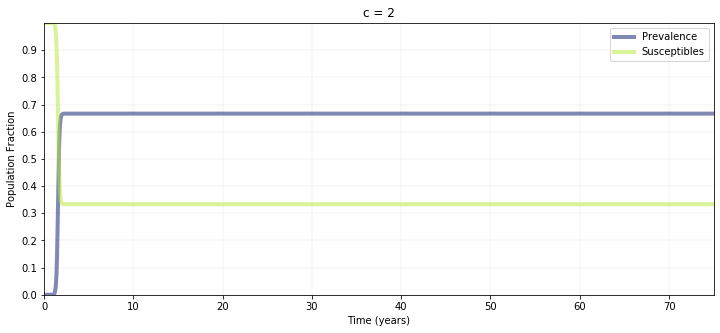

In [18]:
for partRate in [.5 , .6, .675, .7, .75, .8, 1, 1.5, 2]:
    ret = odeint(model.dGonorrhea, y0, t, args=(N, beta, partRate, 1 / duration))
    (S, I) = ret.T
    tp = ((I/N, '#02146b', 'Prevalence'), (S/N, '#b4e830', 'Susceptibles'))
    (fig, ax) = aux.plotEpiDynamicsPop(tp, t/12, tmax/12, 1)
    ax.set_title('c = ' + str(partRate))
    ax.set_xticks(np.arange(0, tmax/12, 10))
    ax.set_yticks(np.arange(0, 1, .1))
    plt.grid(b=True, which='major', alpha=.5, lw=.2, color='#666666', linestyle='--')
    plt.savefig(
        './img/Gonorrhea_' + str(int(partRate * 100)).zfill(3) + '.png',  
        dpi=500, pad_inches=.01, bbox_inches='tight'
    )